## **Installing required packages**

In [ ]:
pip install jarvis-tools

In [ ]:
pip install xbart

In [ ]:
pip install git+https://github.com/JakeColtman/bartpy

  Cloning https://github.com/JakeColtman/bartpy to /tmp/pip-req-build-zuzjqtxy
  Running command git clone -q https://github.com/JakeColtman/bartpy /tmp/pip-req-build-zuzjqtxy
  Created wheel for bartpy: filename=bartpy-0.0.2-cp36-none-any.whl size=52926 sha256=04d54e38e9dfa02b3a08e68724d8ea5816777f24ead04d68b9834cadc069040d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ele3n4qq/wheels/75/b8/32/f61ac842f0c0c0872f157087d7cf8ac967852d574d38e74f0e
Successfully built bartpy


## **Importing Packages**

In [1]:
%matplotlib inline
from jarvis.ai.pkgs.lgbm.regression import parameters_dict
from scipy.stats import median_absolute_deviation as mad
from jarvis.ai.pkgs.utils import get_ml_data
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from jarvis.ai.pkgs.utils import regr_scores
import joblib
import matplotlib.pyplot as plt
from xbart import XBART
import time
from bartpy.sklearnmodel import SklearnModel
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Obtaining raw io files...


In [2]:
# Calculating Mean Absolute Deviation
def mean_abs_dev(y):
  mean = np.mean(y)
  sum = np.array([0])

  for i in range(len(y)):
    dev = np.absolute(y[i] - mean)
    sum = np.add(sum,round(dev,3))

  return sum/len(y)

## **Downloading data**

In [17]:
prop = "max_ir_mode"
X,y,jid=get_ml_data(dataset="cfid_3d", ml_property=prop)

print("Downloaded data")


Obtaining JARVIS-3D CFID dataset 37k...
Downloaded data


## **Applying GBDT**

In [ ]:
## Using GBDT

## sqrt only for eps data
y1 = np.sqrt(y)

X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(X, y, jid, random_state=1, test_size=.1)
lgbm = lgb.LGBMRegressor(
        n_estimators=75,
        learning_rate=0.05374708509141705,
        num_leaves=242
        )
start_time = time.time()
lgbm.fit(X_train, y_train,eval_set=[(X_test, y_test), (X_train, y_train)],verbose=10)
lgb.plot_metric(lgbm)
training_time = time.time() - start_time
print("Training time: "+str(training_time)+" seconds")
pred = lgbm.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, pred, squared=True)
print(rms)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print(mae)

## **Training GBDT in loop**

In [7]:
gbdt_cols = ["Property", "Training_time", "RMSE", "MAE", "MAD", "MAE/MAD"]
model_details = pd.DataFrame(columns=gbdt_cols)

params = parameters_dict()
print("GBDT Training\n")
for i, j in params.items():

    # Downloading dataset
    print("Downloading "+str(i))
    X, y, jid = get_ml_data(dataset="cfid_3d", ml_property=i)
    print("Download Complete")
    # Additional computation in case of dielectric constant
    if "eps" in i:
        y = np.sqrt(y)

    # Sampling of training and test data
    print("Sampling data")
    X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(
        X, y, jid, random_state=1, test_size=0.1
    )

    # Defining GBDT Model
    lgbm = lgb.LGBMRegressor(
      n_estimators=j["n_estimators"],
      learning_rate=j["learning_rate"],
      num_leaves=j["num_leaves"],
    )

    # Training the model
    print("Training "+str(i)+" using GBDT")
    start_time = time.time()
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=100)
    training_time = time.time() - start_time
    print("Training time: "+str(training_time)+" seconds")
    print("Training Complete")
    lgb.plot_metric(lgbm)
    pred = lgbm.predict(X_train)
    rms = mean_squared_error(y_train, pred, squared=False)
    print("RMSE "+str(rms))
    
    mae = mean_absolute_error(y_train, pred)
    print("MAE"+str(mae))

    # Testing the prediction
    pred = lgbm.predict(X_test)
    rms = mean_squared_error(y_test, pred, squared=False)
    print("RMSE "+str(rms))
    
    mae = mean_absolute_error(y_test, pred)
    print("MAE"+str(mae))
    #reg_sc = regr_scores(y_test, pred)
    #rmse = mean_squared_error(y_test, pred, squared=True)
    #mae = reg_sc["mae"]  # mean absolute error
    #madev = mean_abs_dev(y)  # mean absolute deviation
    #mae_over_madev = mae/madev
    '''model_details = model_details.append({
      "Property" : i,
      "Training_time" : training_time,
      "RMSE" : rmse,
      "MAE" : mae,
      "MAD" : madev,
      "MAE/MAD" : mae_over_madev
  }, ignore_index=True)'''

    # save model
    model_name = str(i)+"_gbdt.pkl"
    joblib.dump(lgbm, model_name)

    # Use following line to load model
    ## model = joblib.load('lgb.pkl')
    print("\n\n")

#print(model_details)
# Saving model details
#model_details.to_csv("GBDT_Model_Details.csv")

GBDT Training

Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling data
Training optb88vdw_bandgap using GBDT
[100]	training's l2: 0.272529	valid_0's l2: 0.389928
[200]	training's l2: 0.185645	valid_0's l2: 0.351278
[300]	training's l2: 0.136859	valid_0's l2: 0.332108
Training time: 24.187113761901855 seconds
Training Complete
RMSE 0.3582255580060302
MAE0.19713343245618406
RMSE 0.5727622172684053
MAE0.2955665027165857



Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling data
Training mbj_bandgap using GBDT
[100]	training's l2: 0.127333	valid_0's l2: 0.806103
[200]	training's l2: 0.0299327	valid_0's l2: 0.763486
Training time: 31.001769304275513 seconds
Training Complete
RMSE 0.1633417024011199
MAE0.09952349165963391
RMSE 0.872307037405753
MAE0.504284201704539



Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling data
Training epsx using GBDT
[100]	training's l2: 0.0120816	valid_0's l2: 0.972455
Training time: 81.57450675964355 seconds
Tra

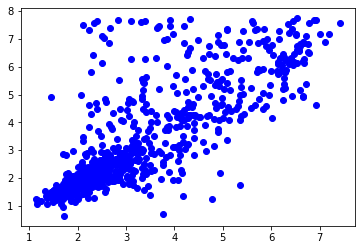

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pred, y_test, c='b')

plt.show()

## **Applying XBART**

In [ ]:
## Using XBART
## sqrt only for eps data
#y1 = np.sqrt(y)

X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(X, y, jid, random_state=1, test_size=.1)
xbt = XBART(num_trees = 376, num_sweeps = 50, burnin = 15,verbose = True)
start_time = time.time()
xbt.fit(X_train,y_train)
training_time = time.time() - start_time
print("Training time: "+str(training_time)+" seconds")
pred = xbt.predict(X_train)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_train, pred, squared=False)
print(rms)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, pred)
print(mae)


In [ ]:
pred = xbt.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, pred, squared=False)
print(rms)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print(mae)

In [22]:
xbt.to_json(str(prop)+"_xbt.json")

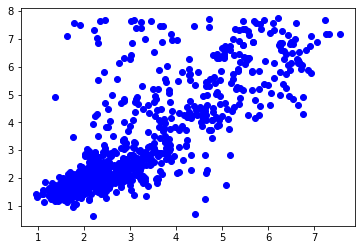

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pred, y_test, c='b')

plt.show()

## **Applying XBART in loop**

In [ ]:
xbart_cols = ["Property", "Training_time", "RMSE", "MAE", "MAD", "MAE/MAD"]
model_details = pd.DataFrame(columns=xbart_cols)

xbart_params = pd.read_csv("training_params.csv")

print("XBART Training\n")
for i in range(len(xbart_params)):

  # Downloading dataset
  print("Downloading "+str(xbart_params["property"][i]))
  X, y, jid = get_ml_data(dataset="cfid_3d", ml_property=xbart_params["property"][i])
  print("Download Complete")
  # Additional computation in case of dielectric constant
  if "eps" in xbart_params["property"][i]:  
        y = np.sqrt(y)

  # Sampling of training and test data
  print("Sampling Data")
  X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(
        X, y, jid, random_state=1, test_size=0.1
  )

  # Defining XBART Model
  xbt = XBART(num_trees = xbart_params["trees"][i], num_sweeps = 50, burnin = 15)

  # Training the model
  print("Training "+str(xbart_params["property"][i])+" using XBART")
  start_time = time.time()
  xbt.fit(X_train,y_train)
  training_time = time.time() - start_time
  print("Training Complete")
  print("Training time: "+str(training_time)+" seconds")

  # Testing the prediction
  pred = xbt.predict(X_test)
  reg_sc = regr_scores(y_test, pred)
  rmse = mean_squared_error(y_test, pred, squared=True)
  mae = reg_sc["mae"]  # mean absolute error
  madev = mean_abs_dev(y)  # mean absolute deviation
  mae_over_madev = mae/madev
  model_details = model_details.append({
      "Property" : i,
      "Training_time" : training_time,
      "RMSE" : rmse,
      "MAE" : mae,
      "MAD" : madev,
      "MAE/MAD" : mae_over_madev
  }, ignore_index=True)

  # save model
  model_name = str(i)+"_xbart.pkl"
  joblib.dump(xbt, model_name)
  print("\n\n")

  # Use following line to load model
  ## model = joblib.load('lgb.pkl')

print(model_details)

# Saving Model details
model_details.to_csv("XBART_Model_Details.csv")

XBART Training

Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling Data
Training optb88vdw_bandgap using XBART


## **Applying BART**

In [18]:
bart_cols = ["Property", "Training_time", "RMSE", "MAE", "MAD", "MAE/MAD"]
model_details = pd.DataFrame(columns=bart_cols)
## sqrt only for eps data
#y1 = np.sqrt(y)

X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(X, y, jid, random_state=1, test_size=.1)
bartm = SklearnModel(n_burn=10, n_chains=1, n_jobs=1, n_samples=50, n_trees=85)
start_time = time.time()
bartm.fit(X_train, y_train)
training_time = time.time() - start_time
print("Training time: "+str(training_time)+" seconds")
'''
##Testing the prediction
pred = bartm.predict(X_test)
reg_sc = regr_scores(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=True)
mae = reg_sc["mae"]  # mean absolute error
madev = mean_abs_dev(y)  # mean absolute deviation
mae_over_madev = mae/madev
model_details = model_details.append({
    "Property" : prop,
    "Training_time" : training_time,
    "RMSE" : rmse,
    "MAE" : mae,
    "MAD" : madev,
    "MAE/MAD" : mae_over_madev
}, ignore_index=True)'''
pred = bartm.predict(X_train)
rms = mean_squared_error(y_train, pred, squared=False)
print("RMSE "+str(rms))
    
mae = mean_absolute_error(y_train, pred)
print("MAE "+str(mae))

# Testing the prediction
pred = bartm.predict(X_test)
rms = mean_squared_error(y_test, pred, squared=False)
print("RMSE "+str(rms))
    
mae = mean_absolute_error(y_test, pred)
print("MAE "+str(mae))

  0%|          | 0/10 [00:00<?, ?it/s]

Starting burn


  2%|▏         | 1/50 [00:00<00:08,  5.71it/s]

Starting sampling


100%|██████████| 50/50 [00:10<00:00,  4.57it/s]


Training time: 21.744231700897217 seconds
RMSE 339.2820947549895
MAE 209.8854854509704
RMSE 277.77108739582366
MAE 186.97263528375743


In [37]:
#pred = bartm.predict(X_test)
#reg_sc = regr_scores(y_test, pred)
print(reg_sc['rmse'])
#print(rmse)

343.32747118744237


In [ ]:

pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, pred, squared=True)
print(rms)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print(mae)

1.9742604462212006
1.0482357372895166


In [ ]:
print(model)

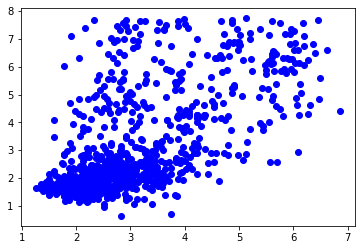

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pred, y_test, c='b')

plt.show()

## **Training BART in loop**

In [ ]:
bart_cols = ["Property", "Training_time", "RMSE", "MAE", "MAD", "MAE/MAD"]
model_details = pd.DataFrame(columns=bart_cols)

bart_params = pd.read_csv("training_params.csv")

print("BART Training\n")
for i in range(len(bart_params)):

  # Downloading dataset
  print("Downloading "+str(bart_params["property"][i]))
  X, y, jid = get_ml_data(dataset="cfid_3d", ml_property=bart_params["property"][i])
  print("Download Complete")

  # Additional computation in case of dielectric constant
  if "eps" in bart_params["property"][i]:  
        y = np.sqrt(y)

  # Sampling of training and test data
  print("Sampling Data")
  X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(
        X, y, jid, random_state=1, test_size=0.1
  )

  # Defining BART Model
  bartm = SklearnModel(n_burn=10, n_chains=1, n_jobs=1, n_samples=50, n_trees=5)

  # Training the model
  print("Training "+str(bart_params["property"][i])+" using BART")
  start_time = time.time()
  bartm.fit(X_train, y_train)
  training_time = time.time() - start_time
  print("Training Complete")
  print("Training time: "+str(training_time)+" seconds")

  '''
  # Testing the prediction
  pred = bartm.predict(X_test)
  reg_sc = regr_scores(y_test, pred)
  rmse = mean_squared_error(y_test, pred, squared=True)
  mae = reg_sc["mae"]  # mean absolute error
  madev = mean_abs_dev(y)  # mean absolute deviation
  mae_over_madev = mae/madev
  model_details = model_details.append({
      "Property" : i,
      "Training_time" : training_time,
      "RMSE" : rmse,
      "MAE" : mae,
      "MAD" : madev,
      "MAE/MAD" : mae_over_madev
  }, ignore_index=True)
  '''

  # save model
  #model_name = str(i)+"_bart.pkl"
  #joblib.dump(bartm, model_name)
  print("\n\n")

  # Use following line to load model
  ## model = joblib.load('lgb.pkl')

print(model_details)
# Saving Model details
model_details.to_csv("BART_Model_Details.csv")

BART Training

Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling Data
Training optb88vdw_bandgap using BART


  0%|          | 0/10 [00:00<?, ?it/s]

Starting burn


  0%|          | 0/50 [00:00<?, ?it/s]

Starting sampling


100%|██████████| 50/50 [00:03<00:00, 15.50it/s]


Training Complete
Training time: 10.015695571899414 seconds



Obtaining JARVIS-3D CFID dataset 37k...


# Plotting

predicted gbdt
predicted bart
predicted xbart


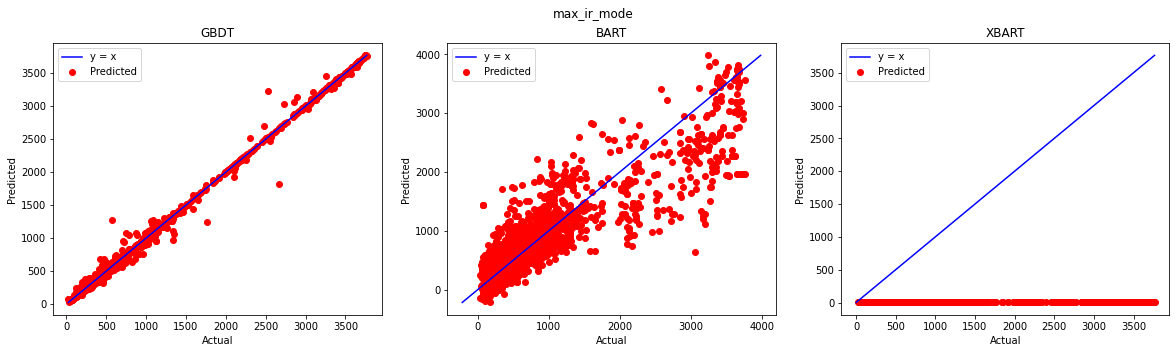

In [19]:
%matplotlib inline
f, axs = plt.subplots(1,3,figsize=(20,5))

gbdt_model = joblib.load(str(prop)+"_gbdt.pkl")
xbt_model = XBART()
xbt_model.from_json(str(prop)+"_xbt.json")

pred_gbdt = gbdt_model.predict(X)
print("predicted gbdt")
pred_bart = bartm.predict(X)
print("predicted bart")
pred_xbart = xbt_model.predict(X)
print("predicted xbart")

## add all arrays in the function... x n predicted
min = np.min(np.concatenate((y, pred_gbdt)))
max = np.max(np.concatenate((y, pred_gbdt)))
x = np.linspace(min,max,2)

plt.subplot(1,3,1)
plt.plot(x,x,c="b")
plt.scatter(y,pred_gbdt,c="r")
plt.title("GBDT")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted'])

min = np.min(np.concatenate((y, pred_bart)))
max = np.max(np.concatenate((y, pred_bart)))
x = np.linspace(min,max,2)

plt.subplot(1,3,2)
plt.plot(x,x,c="b")
plt.scatter(y,pred_bart,c="r")
plt.title("BART")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted']) 

min = np.min(np.concatenate((y, pred_xbart)))
max = np.max(np.concatenate((y, pred_xbart)))
x = np.linspace(min,max,2)

plt.subplot(1,3,3)
plt.plot(x,x,c="b")
plt.scatter(y,pred_xbart,c="r")
plt.title("XBART")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted']) 

plt.suptitle(prop)
plt.show()

### **Roughs to be ignored**

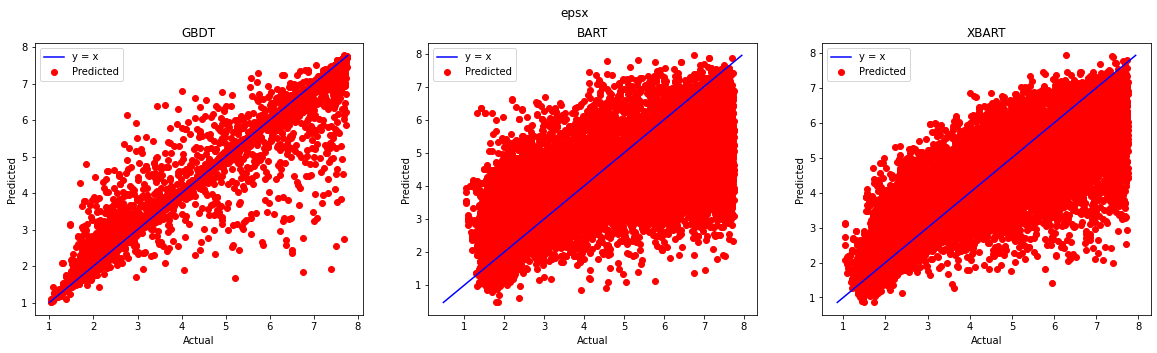

In [6]:
## add all arrays in the function... x n predicted
%matplotlib inline
f, axs = plt.subplots(1,3,figsize=(20,5))
min = np.min(np.concatenate((y1, pred_gbdt)))
max = np.max(np.concatenate((y1, pred_gbdt)))
x = np.linspace(min,max,2)

plt.subplot(1,3,1)
plt.plot(x,x,c="b")
plt.scatter(y1,pred_gbdt,c="r")
plt.title("GBDT")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted'])

min = np.min(np.concatenate((y1, pred_bart)))
max = np.max(np.concatenate((y1, pred_bart)))
x = np.linspace(min,max,2)

plt.subplot(1,3,2)
plt.plot(x,x,c="b")
plt.scatter(y1,pred_bart,c="r")
plt.title("BART")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted']) 

min = np.min(np.concatenate((y1, pred_xbart)))
max = np.max(np.concatenate((y1, pred_xbart)))
x = np.linspace(min,max,2)

plt.subplot(1,3,3)
plt.plot(x,x,c="b")
plt.scatter(y1,pred_xbart,c="r")
plt.title("XBART")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(['y = x','Predicted']) 

plt.suptitle(prop)
plt.show()

In [ ]:
print(x.shape)

(8342, 1557)


In [ ]:
xbt1 = XBART()
xbt1.from_json("gbdt_wala_xbt.xbart")

XBART(num_trees = 50, num_sweeps = 50, n_min = 1, num_cutpoints = 100, alpha = 0.95, beta = 1.25, tau = 0.02, burnin = 15, mtry = 1557, max_depth_num = 250, kap = 16.0, s = 4.0, verbose = False, parallel = False, seed = 0, model_num = 0, no_split_penality = 4.605170185988092, sample_weights_flag = True, num_classes = 1)

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
pred1 = xbt1.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, pred1, squared=True)
print(rms)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
print(mae)

1.1219673773305399
0.6701109307007065


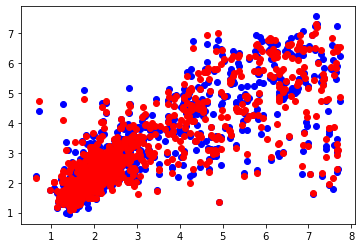

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test, pred, c='b')
ax1.scatter(y_test, pred1, c='r')

plt.show()

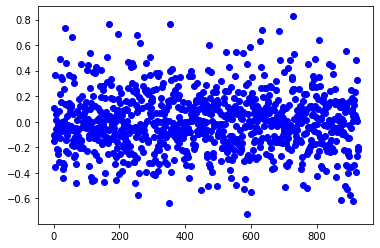

In [ ]:
residual = pred - pred1
x = []
for i in range(len(residual)):
  x.append(i)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, residual, c='b')

In [ ]:
import pandas as pd

df = pd.read_csv("training_params.csv")

            Property  Training_time      RMSE       MAE  MAD  MAE/MAD
0  optb88vdw_bandgap     126.111651  0.328057  0.295567  0.0      inf


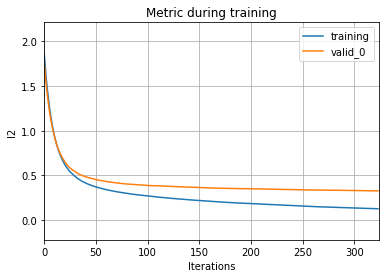

In [ ]:
print(model_details)
model = joblib.load('optb88vdw_bandgap_gbdt.pkl')
lgb.plot_metric(model)

In [ ]:
X, y, jid = get_ml_data(dataset="cfid_3d", ml_property="optb88vdw_bandgap")

Obtaining JARVIS-3D CFID dataset 37k...


In [ ]:
k = [2,3,4,6,10]
mean = np.mean(k)
sum = np.array([0])
print(sum)

# Calculate mean absolute deviation
for i in range(len(k)):
   dev = np.absolute(k[i] - mean)

   sum = np.add(sum,round(dev,2))

#madev = mad(k,axis=2)
print(sum/len(k))
print(sum)

[0]
[2.4]
[12.]


In [ ]:
def mean_abs_dev(y):
  mean = np.mean(y)
  sum = np.array([0])

  for i in range(len(y)):
    dev = np.absolute(y[i] - mean)
    sum = np.add(sum,round(dev,3))

  return sum/len(y)

In [ ]:
# Downloading dataset
print("Downloading ")
X, y, jid = get_ml_data(dataset="cfid_3d", ml_property="mbj_bandgap")
print("Download Complete")

# Additional computation in case of dielectric constant
if "eps" in "epsx":  
  y = np.sqrt(y)

# Sampling of training and test data
print("Sampling Data")
X_train, X_test, y_train, y_test, jid_train, jid_test = train_test_split(
      X, y, jid, random_state=1, test_size=0.1
)

# Defining XBART Model
xbt = XBART(num_trees = 50, num_sweeps = 50, burnin = 15)

# Training the model
start_time = time.time()
print("Training Started")
xbt.fit(X_train,y_train)
training_time = time.time() - start_time
print("Training Complete")
print("Training time: "+str(training_time)+" seconds")

# Testing the prediction
pred = xbt.predict(X_test)
reg_sc = regr_scores(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=True)
mae = reg_sc["mae"]  # mean absolute error
madev = mean_abs_dev(y)  # mean absolute deviation
mae_over_madev = mae/madev
model_details = model_details.append({
    "Property" : "mbj_bandgap",
    "Training_time" : training_time,
    "RMSE" : rmse,
    "MAE" : mae,
    "MAD" : madev,
    "MAE/MAD" : mae_over_madev
}, ignore_index=True)

# save model
model_name = "mbj_bandgap_xbart.pkl"
joblib.dump(xbt, model_name)

# Use following line to load model
## model = joblib.load('lgb.pkl')
print(model_details)
# Saving Model details
model_details.to_csv("XBART_Model_Details.csv")

Obtaining JARVIS-3D CFID dataset 37k...
Download Complete
Sampling Data
Training Started
Training Complete
Training time: 1559.126134634018 seconds


NameError: ignored

In [ ]:
ax = np.linspace(np.min(pred),np.max(pred),1000)

plt.subplot(1,3,1)
plt.scatter(y,pred_gbdt,c="r")
plt.plot(ax,ax,c="b")
plt.title("GBDT")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")

plt.subplot(1,3,2)
plt.scatter(y,pred_bart,c="r")
plt.plot(ax,ax,c="b")
plt.title("BART")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")

plt.subplot(1,3,3)
plt.scatter(y,pred_xbart,c="r")
plt.plot(ax,ax,c="b")
plt.title("XBART")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")

plt.suptitle("IR")

            Property  Training_time  ...                  MAD             MAE/MAD
0  optb88vdw_bandgap      120.65052  ...  [1.001152732940071]  [0.29522618576748]

[1 rows x 6 columns]
